In [57]:
from scripts import *

## Loading the training, testing and validation datasets

In [58]:
batch_size = 32 
img_height = 150
img_width = 150

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/smallbirds/train15',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2419 files belonging to 15 classes.


In [59]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/smallbirds/test15',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 75 files belonging to 15 classes.


In [60]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/smallbirds/valid15',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 75 files belonging to 15 classes.


## EDA

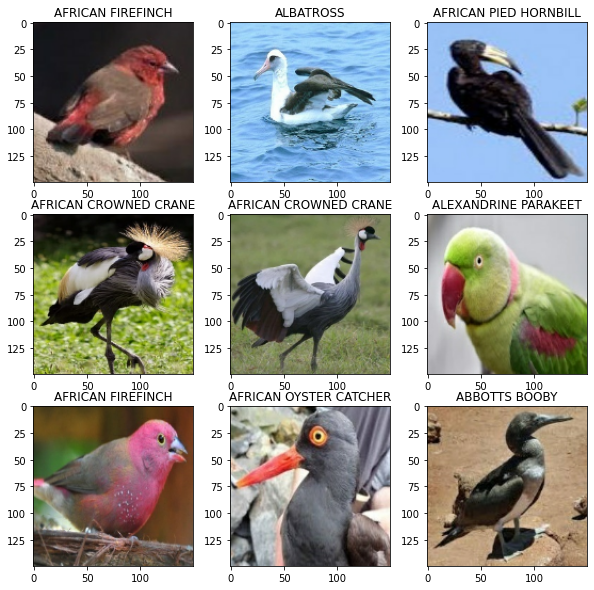

In [61]:
# Plotting 9 random pictures of birds from the training dataset

plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(train_ds.class_names[labels[i]])
        

## Model for 15 birds

In [62]:
# Uncomment to run code

# Since our images are in color, the rgb values need to be rescaled to [0-1] range for the neural network to have an easier time

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15)    
])

## Model for 450 birds

In [63]:
# # Uncomment to run code

# # Since our images are in color, the rgb values need to be rescaled to [0-1] range for the neural network to have an easier time

# model = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.Conv2D(32, 3, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(64, 3, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Conv2D(128, 3, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(450)    
# ])

## Note:

Accuracy dropped when adding another Conv2D and MaxPooling2d layer for the 15 birds model

In [64]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [65]:
history = model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10
)

Epoch 1/10
76/76 [==============================] - 5s 57ms/step - loss: 2.4155 - accuracy: 0.2609 - val_loss: 1.5357 - val_accuracy: 0.6000
Epoch 2/10
76/76 [==============================] - 4s 54ms/step - loss: 1.2034 - accuracy: 0.6176 - val_loss: 1.2700 - val_accuracy: 0.5600
Epoch 3/10
76/76 [==============================] - 4s 53ms/step - loss: 0.6043 - accuracy: 0.8222 - val_loss: 0.8374 - val_accuracy: 0.7333
Epoch 4/10
76/76 [==============================] - 4s 54ms/step - loss: 0.2487 - accuracy: 0.9363 - val_loss: 0.9092 - val_accuracy: 0.7200
Epoch 5/10
76/76 [==============================] - 4s 53ms/step - loss: 0.0885 - accuracy: 0.9826 - val_loss: 0.9357 - val_accuracy: 0.7867
Epoch 6/10
76/76 [==============================] - 4s 52ms/step - loss: 0.0419 - accuracy: 0.9926 - val_loss: 0.8702 - val_accuracy: 0.8400
Epoch 7/10
76/76 [==============================] - 4s 53ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 1.0268 - val_accuracy: 0.8133
Epoch 8/10
76

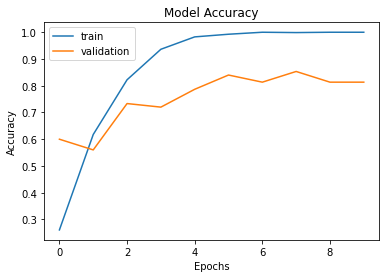

In [66]:
plotsave_accuracy(history, '15birdsacc')

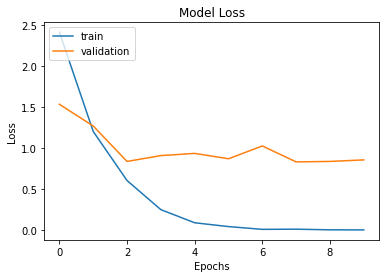

In [67]:
plotsave_loss(history, '15birdsloss')

In [70]:
model.evaluate(valid_ds)
model.evaluate(train_ds)
model.evaluate(test_ds)

3/3 [==============================] - 0s 12ms/step - loss: 0.7548 - accuracy: 0.8533


[0.7548002004623413, 0.8533333539962769]

# Saving model

In [69]:
model.save('models/cnn15.h5')